## library

In [ ]:
!git clone https://github.com/facebookresearch/segment-anything.git

Cloning into 'segment-anything'...
remote: Enumerating objects: 295, done.
remote: Total 295 (delta 0), reused 0 (delta 0), pack-reused 295
Receiving objects: 100% (295/295), 18.30 MiB | 26.93 MiB/s, done.
Resolving deltas: 100% (155/155), done.


In [ ]:
cd segment-anything/

/content/segment-anything


In [ ]:
!pip install -e .

Obtaining file:///content/segment-anything
  Preparing metadata (setup.py) ... done
  Running setup.py develop for segment-anything


In [ ]:
!pip install opencv-python pycocotools matplotlib onnxruntime onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 15.3 MB/s eta 0:00:00


In [ ]:
!pip install urllib3
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
pwd

'/content/segment-anything'

In [ ]:
import sys
sys.path.append(".")

In [ ]:

import cv2
import numpy as np
import supervision as sv
# from typing import List
import matplotlib.pyplot as plt
import torch

from PIL import Image
from transformers import YolosFeatureExtractor, YolosForObjectDetection
import torch
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor, ToPILImage


In [ ]:
# import sys
# sys.path.append("./segment-anything")
from segment_anything import sam_model_registry, SamPredictor

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/dataset/sam"

/content/drive/MyDrive/dataset/sam


In [ ]:
# Segment-Anything checkpoint
SAM_ENCODER_VERSION = "vit_h"
SAM_CHECKPOINT_PATH = "./sam_vit_h_4b8939.pth"

In [ ]:
# Building SAM Model and SAM Predictor
sam = sam_model_registry[SAM_ENCODER_VERSION](checkpoint=SAM_CHECKPOINT_PATH)
sam.to(device=DEVICE)
sam_predictor = SamPredictor(sam)

In [ ]:
sam

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [ ]:
sam_predictor

## yolo fashion

In [ ]:

MODEL_NAME = "valentinafeve/yolos-fashionpedia"

In [ ]:
feature_extractor = YolosFeatureExtractor.from_pretrained('hustvl/yolos-small')
model = YolosForObjectDetection.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/275 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/yolos/feature_extraction_yolos.py:38: FutureWarning: The class YolosFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use YolosImageProcessor instead.
  warnings.warn(
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


config.json:   0%|          | 0.00/2.69k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/123M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
model

YolosForObjectDetection(
  (vit): YolosModel(
    (embeddings): YolosEmbeddings(
      (patch_embeddings): YolosPatchEmbeddings(
        (projection): Conv2d(3, 384, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
      (interpolation): InterpolateInitialPositionEmbeddings()
    )
    (encoder): YolosEncoder(
      (layer): ModuleList(
        (0-11): 12 x YolosLayer(
          (attention): YolosAttention(
            (attention): YolosSelfAttention(
              (query): Linear(in_features=384, out_features=384, bias=True)
              (key): Linear(in_features=384, out_features=384, bias=True)
              (value): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): YolosSelfOutput(
              (dense): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
        

In [ ]:
def fix_channels(t):
    """
    Some images may have 4 channels (transparent images) or just 1 channel (black and white images), in order to let the images have only 3 channels. I am going to remove the fourth channel in transparent images and stack the single channel in back and white images.
    :param t: Tensor-like image
    :return: Tensor-like image with three channels
    """
    if len(t.shape) == 2:
        return ToPILImage()(torch.stack([t for i in (0, 0, 0)]))
    if t.shape[0] == 4:
        return ToPILImage()(t[:3])
    if t.shape[0] == 1:
        return ToPILImage()(torch.stack([t[0] for i in (0, 0, 0)]))
    return ToPILImage()(t)

In [ ]:
def idx_to_text(i):
    return cats[i]

In [ ]:
# Random colors used for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

# for output bounding box post-processing
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)

def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b

def plot_results(pil_img, prob, boxes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for p, (xmin, ymin, xmax, ymax), c in zip(prob, boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        cl = p.argmax()
        ax.text(xmin, ymin, idx_to_text(cl), fontsize=10,
                bbox=dict(facecolor=c, alpha=0.8))
    plt.axis('off')
    plt.show()
    plt.savefig("image.png")

In [ ]:
def visualize_predictions(image, outputs, threshold=0.8):
    # keep only predictions with confidence >= threshold
    probas = outputs.logits.softmax(-1)[0, :, :-1]
    keep = probas.max(-1).values > threshold

    # convert predicted boxes from [0; 1] to image scales
    bboxes_scaled = rescale_bboxes(outputs.pred_boxes[0, keep].cpu(), image.size)

    # plot results
    plot_results(image, probas[keep], bboxes_scaled)

In [ ]:
cd "/content/drive/MyDrive/Colab Notebooks/이미지태깅/data/"

/content/drive/MyDrive/Colab Notebooks/이미지태깅/data


In [ ]:
IMAGE_PATH = "./turtle_neck.jpg"
cats = ['shirt, blouse', 'top, t-shirt, sweatshirt', 'sweater', 'cardigan', 'jacket', 'vest', 'pants', 'shorts', 'skirt', 'coat', 'dress', 'jumpsuit', 'cape', 'glasses', 'hat', 'headband, head covering, hair accessory', 'tie', 'glove', 'watch', 'belt', 'leg warmer', 'tights, stockings', 'sock', 'shoe', 'bag, wallet', 'scarf', 'umbrella', 'hood', 'collar', 'lapel', 'epaulette', 'sleeve', 'pocket', 'neckline', 'buckle', 'zipper', 'applique', 'bead', 'bow', 'flower', 'fringe', 'ribbon', 'rivet', 'ruffle', 'sequin', 'tassel']

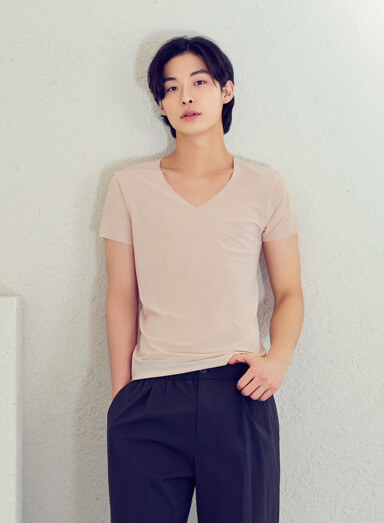

In [ ]:
image = Image.open(open(IMAGE_PATH, "rb"))
image = fix_channels(ToTensor()(image))
# image = image.resize((600, 800))
image

In [ ]:
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)

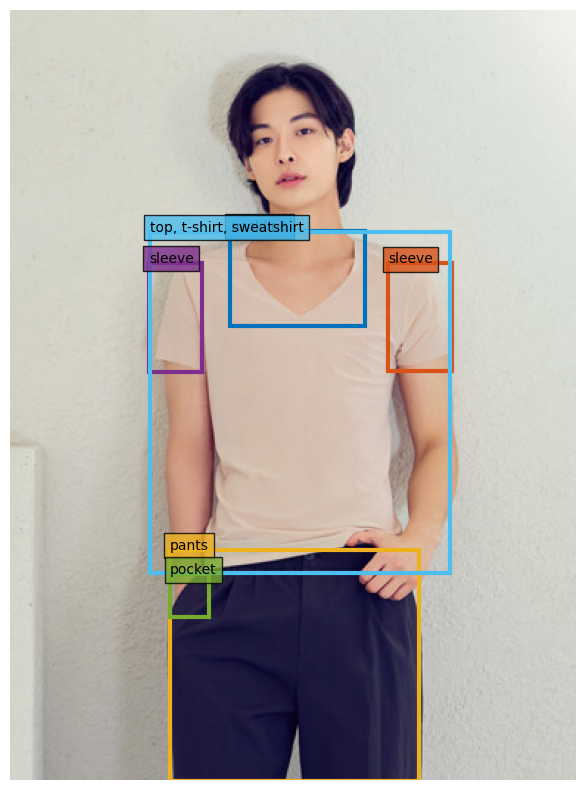

<Figure size 640x480 with 0 Axes>

In [ ]:
img = visualize_predictions(image, outputs, threshold=0.7)
img

In [ ]:
probas = outputs.logits.softmax(-1)[0, :, :-1]
keep = probas.max(-1).values > 0.7



In [ ]:
p = probas[keep]
# p[0]
indices = []
conf = []
idx = []
for i in range(len(probas[keep])):
  name = idx_to_text(p[i].argmax())
  con = max(probas[keep][i]).item()
  indices.append(name)
  conf.append(con)
  idx.append(p[i].argmax())
indices

['neckline', 'sleeve', 'pants', 'sleeve', 'pocket', 'top, t-shirt, sweatshirt']

In [ ]:
conf

[0.9967831373214722,
 0.9989275336265564,
 0.9654380083084106,
 0.9995530247688293,
 0.7903937697410583,
 0.9934410452842712]

In [ ]:
# convert predicted boxes from [0; 1] to image scales
bboxes_scaled = rescale_bboxes(outputs.pred_boxes[0, keep].cpu(), image.size)

In [ ]:
xyxy = bboxes_scaled.detach().numpy()

## sam

In [ ]:

# save the annotated grounding dino image
# cv2.imwrite("groundingdino_annotated_image.jpg", annotated_frame)


# Prompting SAM with detected boxes
def segment(sam_predictor: SamPredictor, image: np.ndarray, xyxy: np.ndarray) -> np.ndarray:
    sam_predictor.set_image(image)
    result_masks = []
    for box in xyxy:
        masks, scores, logits = sam_predictor.predict(
            box=box,
            multimask_output=True
        )
        index = np.argmax(scores)
        result_masks.append(masks[index])
    return np.array(result_masks)

In [ ]:
image = cv2.imread(IMAGE_PATH)


# convert detections to masks
mask = segment(
    sam_predictor=sam_predictor,
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
    xyxy=xyxy
)

detections = sv.Detections(xyxy)
detections.mask = mask
detections.confidence = conf
detections.class_id = idx
detections.tracker_id = None
detections.data = {}

In [ ]:
detections

Detections(xyxy=array([[149.19284 , 149.30136 , 240.78638 , 213.87094 ],
       [256.328   , 171.6013  , 299.83707 , 244.83258 ],
       [107.88182 , 366.12015 , 277.3668  , 523.23047 ],
       [ 93.930145, 171.25531 , 129.65544 , 245.1905  ],
       [108.33199 , 382.6046  , 134.7113  , 411.54535 ],
       [ 94.40994 , 149.96439 , 298.27643 , 382.19507 ]], dtype=float32), mask=array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False,

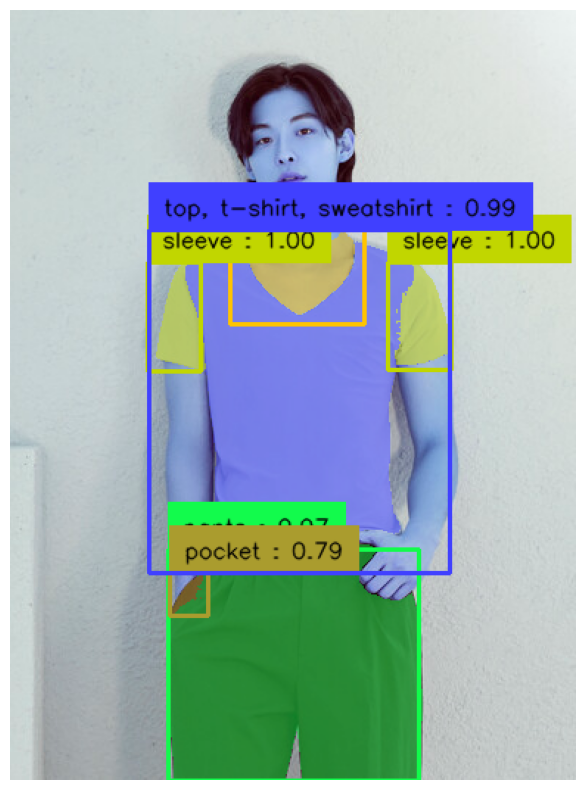

In [ ]:
# annotate image with detections
box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()

labels =[
    f"{idx_to_text(class_id)} : {conf:0.2f}"
    for  _, _, conf, class_id, _, _  in detections ]
annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)


plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.axis('off')
plt.show()

In [ ]:
indices

['neckline', 'sleeve', 'pants', 'sleeve', 'pocket', 'top, t-shirt, sweatshirt']

In [ ]:

# Apply the mask on the original image
masked_image = cv2.bitwise_and(image, image, mask=detections.mask[6].astype(np.uint8)*255)

# Save the masked image as a JPG file
# plt.imsave("./masked_image1.jpg", masked_image)



IndexError: index 6 is out of bounds for axis 0 with size 6

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(masked_image)
plt.axis('off')
plt.show()

In [ ]:
masked_image

## 특징 분류 모델
neck만 가능

In [ ]:
from torchvision import models
import torch

# model = models.resnet18(weights = "ResNet18_Weights.IMAGENET1K_V1")




model = models.vgg16(
    weights = "VGG16_Weights.IMAGENET1K_V1"
)


In [ ]:
from torch import nn
from torch import optim
from torch.nn import functional as F


model.classifier[6] = nn.Linear(4096,24)
# model.fc = nn.Linear(512,24)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

In [ ]:
cd "/content/drive/MyDrive/Colab Notebooks/이미지태깅/data/"

/content/drive/MyDrive/Colab Notebooks/이미지태깅/data


In [ ]:
model_dict = torch.load('./vgg_model.pt', map_location=torch.device('cpu'))
model.load_state_dict(model_dict)

<All keys matched successfully>

In [ ]:
import torch
from torchvision import transforms

transform = transforms.Compose(
        [
            transforms.PILToTensor(),
            transforms.ConvertImageDtype(dtype = torch.float),
            transforms.Resize(256)
            ,transforms.Normalize(
                mean = [0.48235,0.45882,0.40784],
                std = [1.0/255.0,1.0/255.0,1.0/255.0]
            )
        ]
    )

# images = transform(Image.fromarray(masked_image))





images = transform(Image.fromarray(image))

In [ ]:
with torch.no_grad():
  model.eval()
  images = images.to(device).unsqueeze(0)
  output = model(images)
  outputs = torch.sigmoid(output).cpu().detach().numpy().tolist()

In [ ]:
out = [1 if x > 0.5 else 0 for x in outputs[0]]

In [ ]:

name = ['boat neck', 'classic crew neck', 'classic v-neck', 'cowl neck', 'crew neck', 'deep v-neck', 'fitted v-neck', 'heathered v-neck', 'high-neck', 'illusion neckline', 'knit v-neck', 'mock neck', 'mock-neck', 'neck ribbed', 'neck skater', 'neck striped', 'neckline', 'print v-neck', 'scoop-neck', 'split-neck', 'striped v-neck', 'tie-neck',
 'turtle-neck', 'v-neck']

In [ ]:
import pandas as pd
df = pd.DataFrame( {
    'name': name,
    'idx': outputs[0]
    })

df[df['idx'] >= 0.1]

,name,idx
4,crew neck,0.445905
10,knit v-neck,0.146535
22,turtle-neck,0.171735
23,v-neck,0.339378
